# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 5: Classification and Regression

## Reading: 

PDHB Feature Engineering (pp375-382)

## Today

- Supervised Machine Learning
    - Examples
    - Definitions

- Regression Methods
    - Simple Linear
    - Multivariate
    - Polynomial

- Classification Methods
    - k Nearest Neighbor
    - Logistic Regression
    - Naive Bayes
    - Trees and Forests
    - SVMs
    - Deep Networks

- Training, Testing and Generalization
    - Train/Test
    - Overfitting and Underfitting
    - Regularization

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123)
%matplotlib inline

## Supervised Machine Learning

### Examples

### Definitions

- $x_i$ is an observation 
    - a row in our DataFrame

- $x_i$ is a vector of length $m \in 1,2,\ldots$ 
    - the columns in our DataFrame

- $y_i$ is the label for observation $x_i$
    - the thing we want to predict

Using a training set of $(x_i,y_i)_{i=1:n}$ pairs, find a function that maps $x$ to $y$:

$$\Large f : x \mapsto y$$

- Is $y$ a real number ($y \in \mathbf{R}$)? 
    - **Regression**
    - e.g. temperature, stock price, heart rate
    

- Is $y$ a category or class ($y \in \{c_1,c_2,\ldots\}$)? 
    - **Classification**
    - e.g. positive/negaitve, sunny/cloudy/rainy, yes/no loan default risk 

In [2]:
#Example
X = np.concatenate([np.random.normal(2,1,20),np.random.normal(8,1,20)])

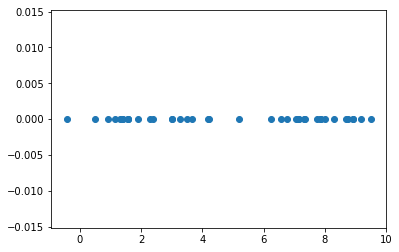

In [3]:
_ = plt.scatter(X,np.zeros(40))

In [4]:
y_regression = 2*X + 1 + np.random.normal(0,3,40)

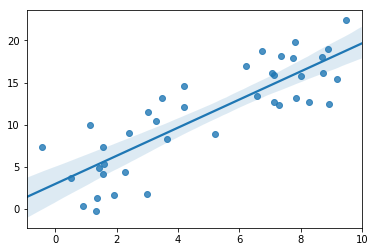

In [5]:
_ = sns.regplot(X,y_regression)

In [6]:
y_classification = np.concatenate([np.zeros(20),np.ones(20)])

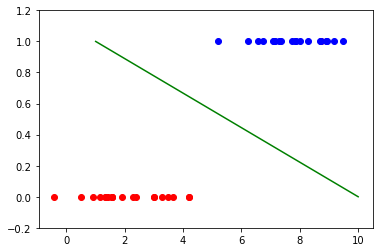

In [7]:
_ = plt.scatter(X[:21],y_classification[:21],color='red')
_ = plt.scatter(X[-20:],y_classification[-20:],color='blue')
_ = plt.plot([1,10],[1,0],color='g')
_ = plt.ylim(-.2,1.2);

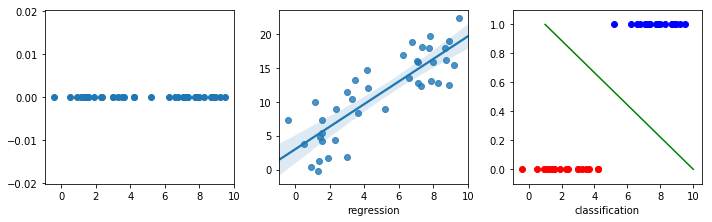

In [8]:
fig,ax = plt.subplots(1,3,figsize=(10,3))
_ = ax[0].scatter(X,np.zeros(40))
_ = sns.regplot(X,y_regression, ax=ax[1])
_ = ax[2].scatter(X[:21],y_classification[:21],color='red')
_ = ax[2].scatter(X[-20:],y_classification[-20:],color='blue')
_ = plt.plot([1,10],[1,0],color='g')
_ = ax[2].set_ylim(-.1,1.1); _ = plt.tight_layout()
_ = ax[1].set_xlabel('regression'); _ = ax[2].set_xlabel('classification')

#### Other types of Machine Learning

- Unsupervised
    - Clustering
    - Dimensionality Reduction
    - etc...
    

- Reinforcement Learning
    - Pathfinding
    - Task Completion
    - etc...

## sklearn

- `model = SomeModel(arg1=value1, arg2=value2, etc..)`

- model.fit(X,y)

- model.predict(X)

- model.predict_proba(X)

- model.transform(X)

- model.fit_transform(X)

## Regression Methods

### Simple Linear Regression ($m = 1$)

$$\Large y = ax + b$$

$$\Large y_i = \beta_1 x_i + \beta_0$$

In [9]:
tips = sns.load_dataset("tips")

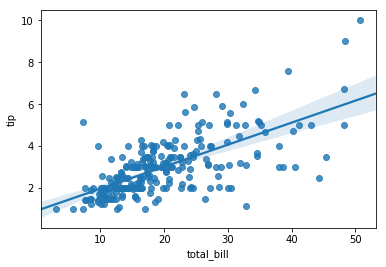

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [11]:
from sklearn.linear_model import LinearRegression 

regr = LinearRegression()

In [12]:
X = tips['total_bill'].values.reshape(-1,1)
y = tips['tip']

regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('beta_0 = {:0.3f}'.format(regr.intercept_))

beta_0 = 0.920


In [14]:
print('beta_1 = {:0.3f}'.format(regr.coef_[0]))

beta_1 = 0.105


### Simple Polynomial Regression ($m=1$)

$$
\Large y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
poly = PolynomialFeatures()
poly.fit_transform(X[:3])

array([[   1.    ,   16.99  ,  288.6601],
       [   1.    ,   10.34  ,  106.9156],
       [   1.    ,   21.01  ,  441.4201]])

$$\Large \begin{align}
x_{i,0} &= 1 \quad \forall x_i \in X \\
\end{align}
$$

$$
\Large y_i = \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,1}^2
$$

In [17]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [18]:
model = model.fit(X, y)

In [19]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,model.named_steps['linear'].coef_[i]))

beta_0 = 0.891
beta_1 = 0.108
beta_2 = -5.71e-05


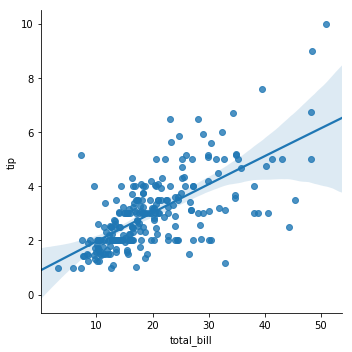

In [20]:
_ = sns.lmplot(x='total_bill', y='tip', data=tips, order=2)

### Multivariate Linear Regression ($m > 1$)

$$\Large 
\begin{align}
y_i &= \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_m x_{i,m} \\
    & = \sum_{j = 0}^{m} \beta_{j}x_{i,j} \\
    & =  \beta x_i
\end{align}
$$

In [21]:
tips['x_0'] = 1
X = tips[['x_0','total_bill','size']].values

In [22]:
regr = LinearRegression(fit_intercept=False)

In [23]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [24]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.669
beta_1 = 0.0927
beta_2 = 0.193


### Issue? : Are total_bill and size correlated?

In [25]:
from scipy.stats import pearsonr

pearsonr(tips['total_bill'], tips['size'])

(0.5983151309049014, 4.3935101424771882e-25)

#### Can we de-correlate them?


In [26]:
tips['total_bill_per_person'] = tips['total_bill'] / tips['size']

In [27]:
pearsonr(tips['total_bill_per_person'], tips['size'])

(-0.17541201654288813, 0.0060090647989592457)

In [28]:
X = tips[['x_0','total_bill_per_person','size']].values
regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = -0.798
beta_1 = 0.212
beta_2 = 0.826


What does $\beta_0$ mean here? Does it make sense?

In [29]:
# Force intercept to zero
tips.x_0 = 0

X = tips[['x_0','total_bill_per_person','size']].values

regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.0
beta_1 = 0.164
beta_2 = 0.679


### Another Implementation: statsmodels

In [30]:
import statsmodels.api as sm

X = tips[['total_bill_per_person','size']].values

X = sm.add_constant(X)

model = sm.OLS(y,X)
residuals = model.fit()
print(residuals.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     92.04
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           2.00e-30
Time:                        19:16:30   Log-Likelihood:                -355.72
No. Observations:                 244   AIC:                             717.4
Df Residuals:                     241   BIC:                             727.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7979      0.290     -2.747      0.0

/home/bgibson/.conda/envs/coms_w4995/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Aside: Prediction Vs. Explanation

In [31]:
regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = -0.798
beta_1 = 0.212
beta_2 = 0.826


In [32]:
# get prediction for total_bill_per_person = 100, size = 1
regr.predict(np.array([0,100.00,1]).reshape(1, -1))

array([ 22.04679864])

## Classification Methods

### k Nearest Neighbor

> "What is the category of most of the $k$ nearest neighbors to $x_i$?"

1. Find k nearest neighbors
2. Take a (weighted?) majority vote

Need to define: 
- k
- what "close" means (***distance metric***)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/320px-KnnClassification.svg.png?1507219931759">

<img src="./images/sphx_glr_plot_classification_001.png">

> Q: What does the machine learn?

#### Pros and Cons of kNN

- fast to train
- potentially slow to predict
- need to deal with categorical variables

### Logistic Regression

> "If we use a squashing function on a linear regression, we can get a classification."

In [33]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(diabetes.data[:, 2].reshape(-1,1), diabetes.target)

In [35]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_pred = regr.predict(X_test)

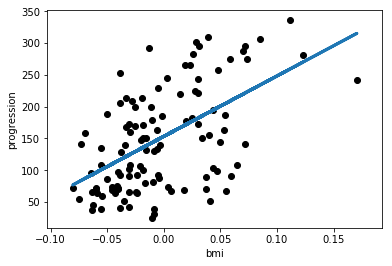

In [37]:
plt.scatter(X_test,y_test, color='k')
plt.plot(X_test,y_pred, linewidth=3)
plt.xlabel('bmi')
plt.ylabel('progression')

In [38]:
y_train_new = y_train > 150
y_test_new = y_test > 150

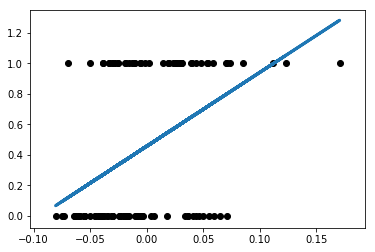

In [39]:
plt.scatter(X_test,y_test_new, color='k')
regr.fit(X_train,y_train_new)
y_pred = regr.predict(X_test)
plt.plot(X_test,y_pred, linewidth=3)

- instead of real number, want {0,1}
- Use the "squashing" function $\sigma$

$$
\Large \sigma(\beta_1 x_i + \beta_0) = \frac{1}{1+e^{-\left(\beta_1 x_i + \beta_0\right)}}
$$

$$ 
\Large
y_i = 
\begin{cases}
1 &\text{if } \sigma (\beta_1 x_i + \beta_0) > 0.5, \\ 
0 &\text{o.w.}
\end{cases}
$$

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logreg.fit(X_train,y_train_new)
y_pred = logreg.predict(X_test)

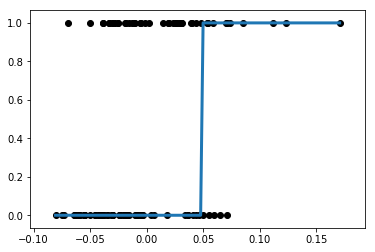

In [43]:
tmp = np.array(sorted(zip(X_test,y_pred), key=lambda x:x[0]))
plt.scatter(X_test,y_test_new, color='k')
plt.plot(tmp[:,0],tmp[:,1], linewidth=3)

#### Pros and Cons of Logistic Regression
- interpretable
- sensitive to scaling of variables
- need to deal with categorical variables

### Naive Bayes

> "If we know ***how likely a class is***, and ***how likely the observation is given the class***, we can guess which class is the better fit"

#### Bayes rule

$$
\Large p(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

$$
\Large p(y_i = 1 \mid x_i) = \frac{P(x_i \mid y_i) P(y_i)}{P(x_i)}
$$

#### Naive Bayes Classifier
$$
\Large \hat{y}_i = \arg\max_{c \in {0,1,\ldots}} p(x_i \mid \hat{y}_i = c) p(\hat{y}_i = c)
$$

#### Pros and Cons of Naive Bayes
- simple
- depends on strong independence assumption
- data scarcity (when learning)
- need to deal with real values

### Trees and Forests

#### Decision Tree

> "If we ask a bunch of yes no questions, we can get to an answer."

<img src="./images/iris_decision_tree.svg">

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Pros and Cons of Decision Trees
- very interpretable
- tendency to overfit

#### (Ensemble of Decision Trees) Random Forest and Gradient Boost

> "If we train a bunch of weak learners, the majority vote will give us an answer."

<img src="https://www.researchgate.net/profile/Evaldas_Vaiciukynas/publication/301638643/figure/fig1/AS:355471899807744@1461762513154/Figure-6-Architecture-of-the-random-forest-model.png">

#### Ensembles and variance

- collection of weak learners

- Random forest - variation with random selection of features

- Gradient Boost - variation due to changes in observation weight

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

#### Pros and Cons of Random Forest and GradientBoost
- less interpretable
- longer to train, fast to evaluate
- slower to train
- performs well in the field

### SVMs

> "Can we find the line/plane that separates our classes, with the largest margin."

<img src="http://docs.opencv.org/2.4/_images/separating-lines.png">

<img src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

<img src="https://media.licdn.com/media/AAEAAQAAAAAAAAr1AAAAJGNkOGQwZWM4LTBkNjItNDdhZC1iMTE0LWUzNTVhMDM2NWNkMg.png">

<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAuSAAAAJDlhYzcwMzhlLTA0MjYtNDEyYS1hMWM4LTE3Zjk5NDlhNzVkMQ.png">

### Pros and Cons of SVM
- slow to learn
- fast to evaluate
- can use kernel trick to learn non-linear functions

### Deep Learning, Convolutional Networks, Neural Nets, Deep Belief Networks,...

<img src="https://www.strong.io/blog-images/movie-posters/Slide6.png">

#### Pros and Cons of Deep Learning
- highly uninterpretable
- can learn complex interactions
- perform well on tasks involving complex signals (eg interactions of layered factors)

## Training, Testing and Generalization

### Train/Tune?/Test

In [47]:
from sklearn.model_selection import train_test_split

### Overfitting and Underfitting

- Overfitting: poor generalization due to complexity (polynomial regression example)

- Underfitting: poor generalization due to simplicity

### Regularization